# Exploratory Data Analysis

#### Problem Statement:

What areas of DC are similar to each other across social, economic, housing, and demographic characteristics? 

* DC is rarely socio-demographically or economicaly explored at a hyper-local level. Some commercial products exist, but generalize the district using zip codes or larger units of analysis. ESRI’s Tapestry product is one of these. Because DC has no congressional representation, companies like Quorum rarely explore it to the same extent they explore, say, Ohio.
* Contemporary analysis typically observes only one or two variables at a time--maps of median income vs X demographic variable, maps displaying the ethnic segregation of DC, etc. Lately, we've seen maps of poverty vs COVID and ethnicity vs COVID. Such analysis can still be elucidating or useful, but with only bivariate comparisons, we’re left to infer the deeper sociodemographic nuances of our own neighborhoods. When it comes to policy, beliefs generated from anecdotal evidence will lead to systems-level bias and injustice. For example, some commentary refers to Anacostia in tones that are, at best, sweeping generalizations of geography and, at worst, racist. We see the same thing in NE, Columbia Heights, and other neighborhoods. 

This analysis will attempt to provide more nuance in describing DC at a granular level. Clustering characteristics across all 179 DC census tracts and a wide range of variables will reveal where areas of likenesses present themselves at a hyper-local level. Beyond dispelling preconceived notions and bias, understanding the granular makeup of the city at this level can help government, planners, social services, and businesses better and more fairly serve DC residents. This analysis will aim to offer insight into issues of gentrification, segregation, class and wealth dispersion in the city, among other topics. 

We gathered the social, economic, housing, and demographic characteristics from the American COmmunity Survey Data Profiles (https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles/). The most recent data avaiable are from 2018, and varaible selection accounted for margins of error--those census tracts with a margin of error greater than 5% were dropped. This is outlined in further detail in the feature engineering section of the project.

 

## Import Libraries and Read in Data:

In [1]:
# Import Libraries:

import pandas as pd
import numpy as np


import geopandas as gpd
import descartes
#! pip install geoplot
#import geoplot

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import requests
from bs4 import BeautifulSoup

In [19]:
# Read data:

df = pd.read_csv('../data/outputs/02_merged_clean.csv', index_col=False)

In [20]:
df.head(2)

geo_id                                             name_x  \
0  1400000US11001000100  Census Tract 1, District of Columbia, District...   
1  1400000US11001000202  Census Tract 2.02, District of Columbia, Distr...   

   total_pop  pct_male  median_age  pct_hisp_latino  pct_white  pct_black  \
0       5160      47.2        41.3             14.6       76.1        0.7   
1       4541      50.8        27.5              8.9       74.3        5.9   

   pct_american_ind  pct_asian  ...  pop_in_households  pct_bach_degree  \
0               0.0        6.2  ...               5147             89.6   
1               0.9        6.3  ...               3540             90.5   

   total_housing_units  occupied_housing_units  total_units_in_structure  \
0                 2805                    2351                      2805   
1                 1852                    1563                      1852   

   units_built_after_2014  owner_occupied_units  renter_occupied_units  \
0                       0                  1294                   1057   
1                      21                  1063                    500   

   median_rent  median_home_value  
0         2289            1333300  
1         2398            1179700  

[2 rows x 29 columns]

## Descriptive Exploration: 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo_id                    177 non-null    object 
 1   name_x                    177 non-null    object 
 2   total_pop                 177 non-null    int64  
 3   pct_male                  177 non-null    float64
 4   median_age                177 non-null    float64
 5   pct_hisp_latino           177 non-null    float64
 6   pct_white                 177 non-null    float64
 7   pct_black                 177 non-null    float64
 8   pct_american_ind          177 non-null    float64
 9   pct_asian                 177 non-null    float64
 10  pct_hawaiian_pacisldr     177 non-null    float64
 11  pct_other_race            177 non-null    float64
 12  pct_unemployed            177 non-null    float64
 13  avg_wrk_commute_mins      177 non-null    float64
 14  median_hsl

In [23]:
# Describe Data:

df['occupied_housing_units'].describe()

count     177.000000
mean     1589.169492
std       729.377096
min        32.000000
25%      1101.000000
50%      1428.000000
75%      1875.000000
max      4811.000000
Name: occupied_housing_units, dtype: float64

## Explore Distributions and Correlations:

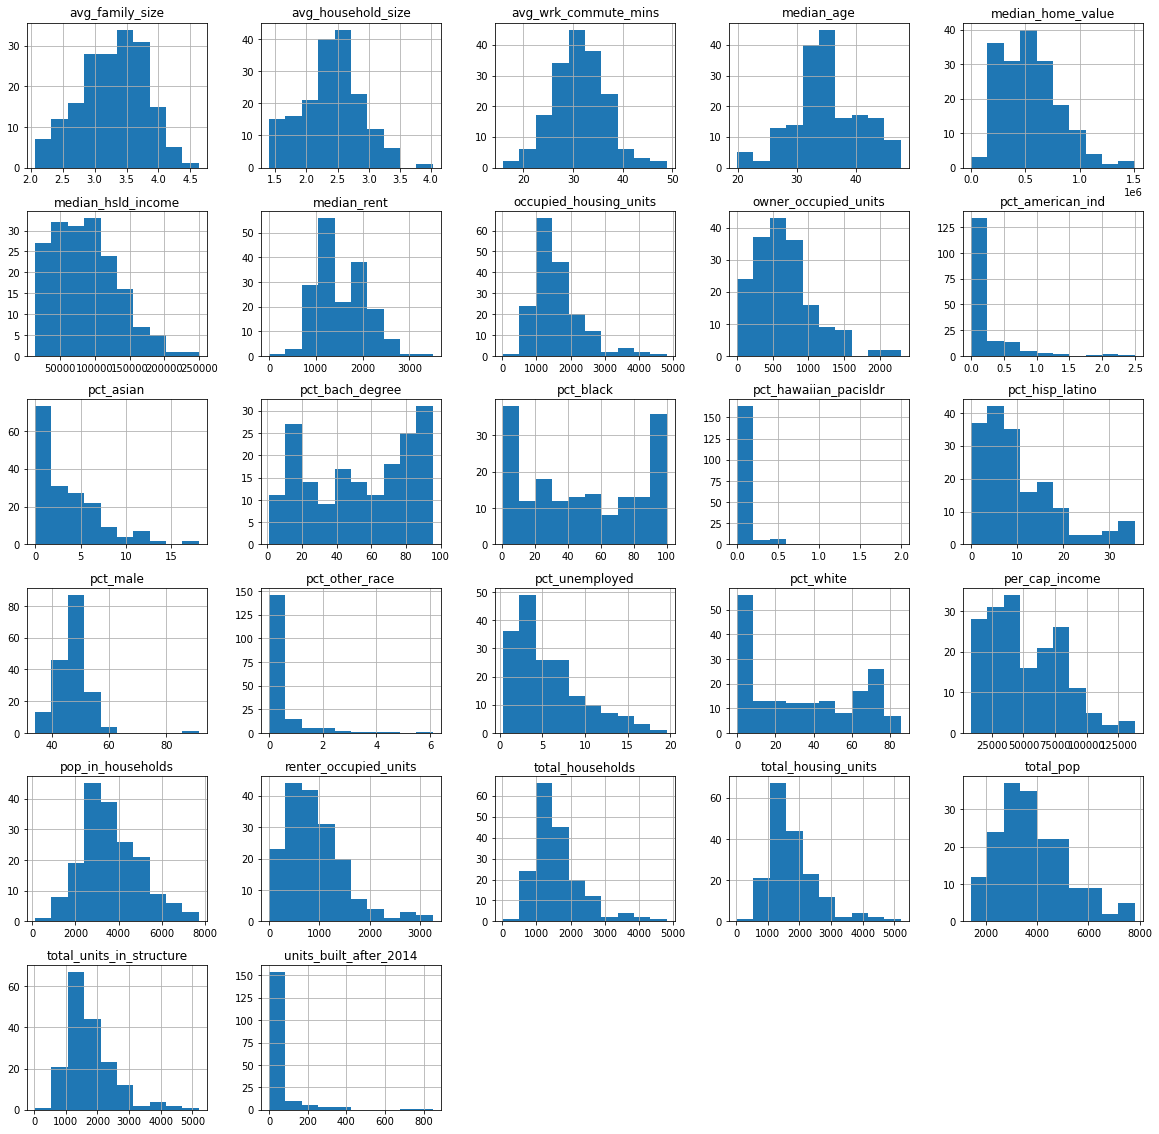

In [6]:

df.hist(figsize = (20,20));

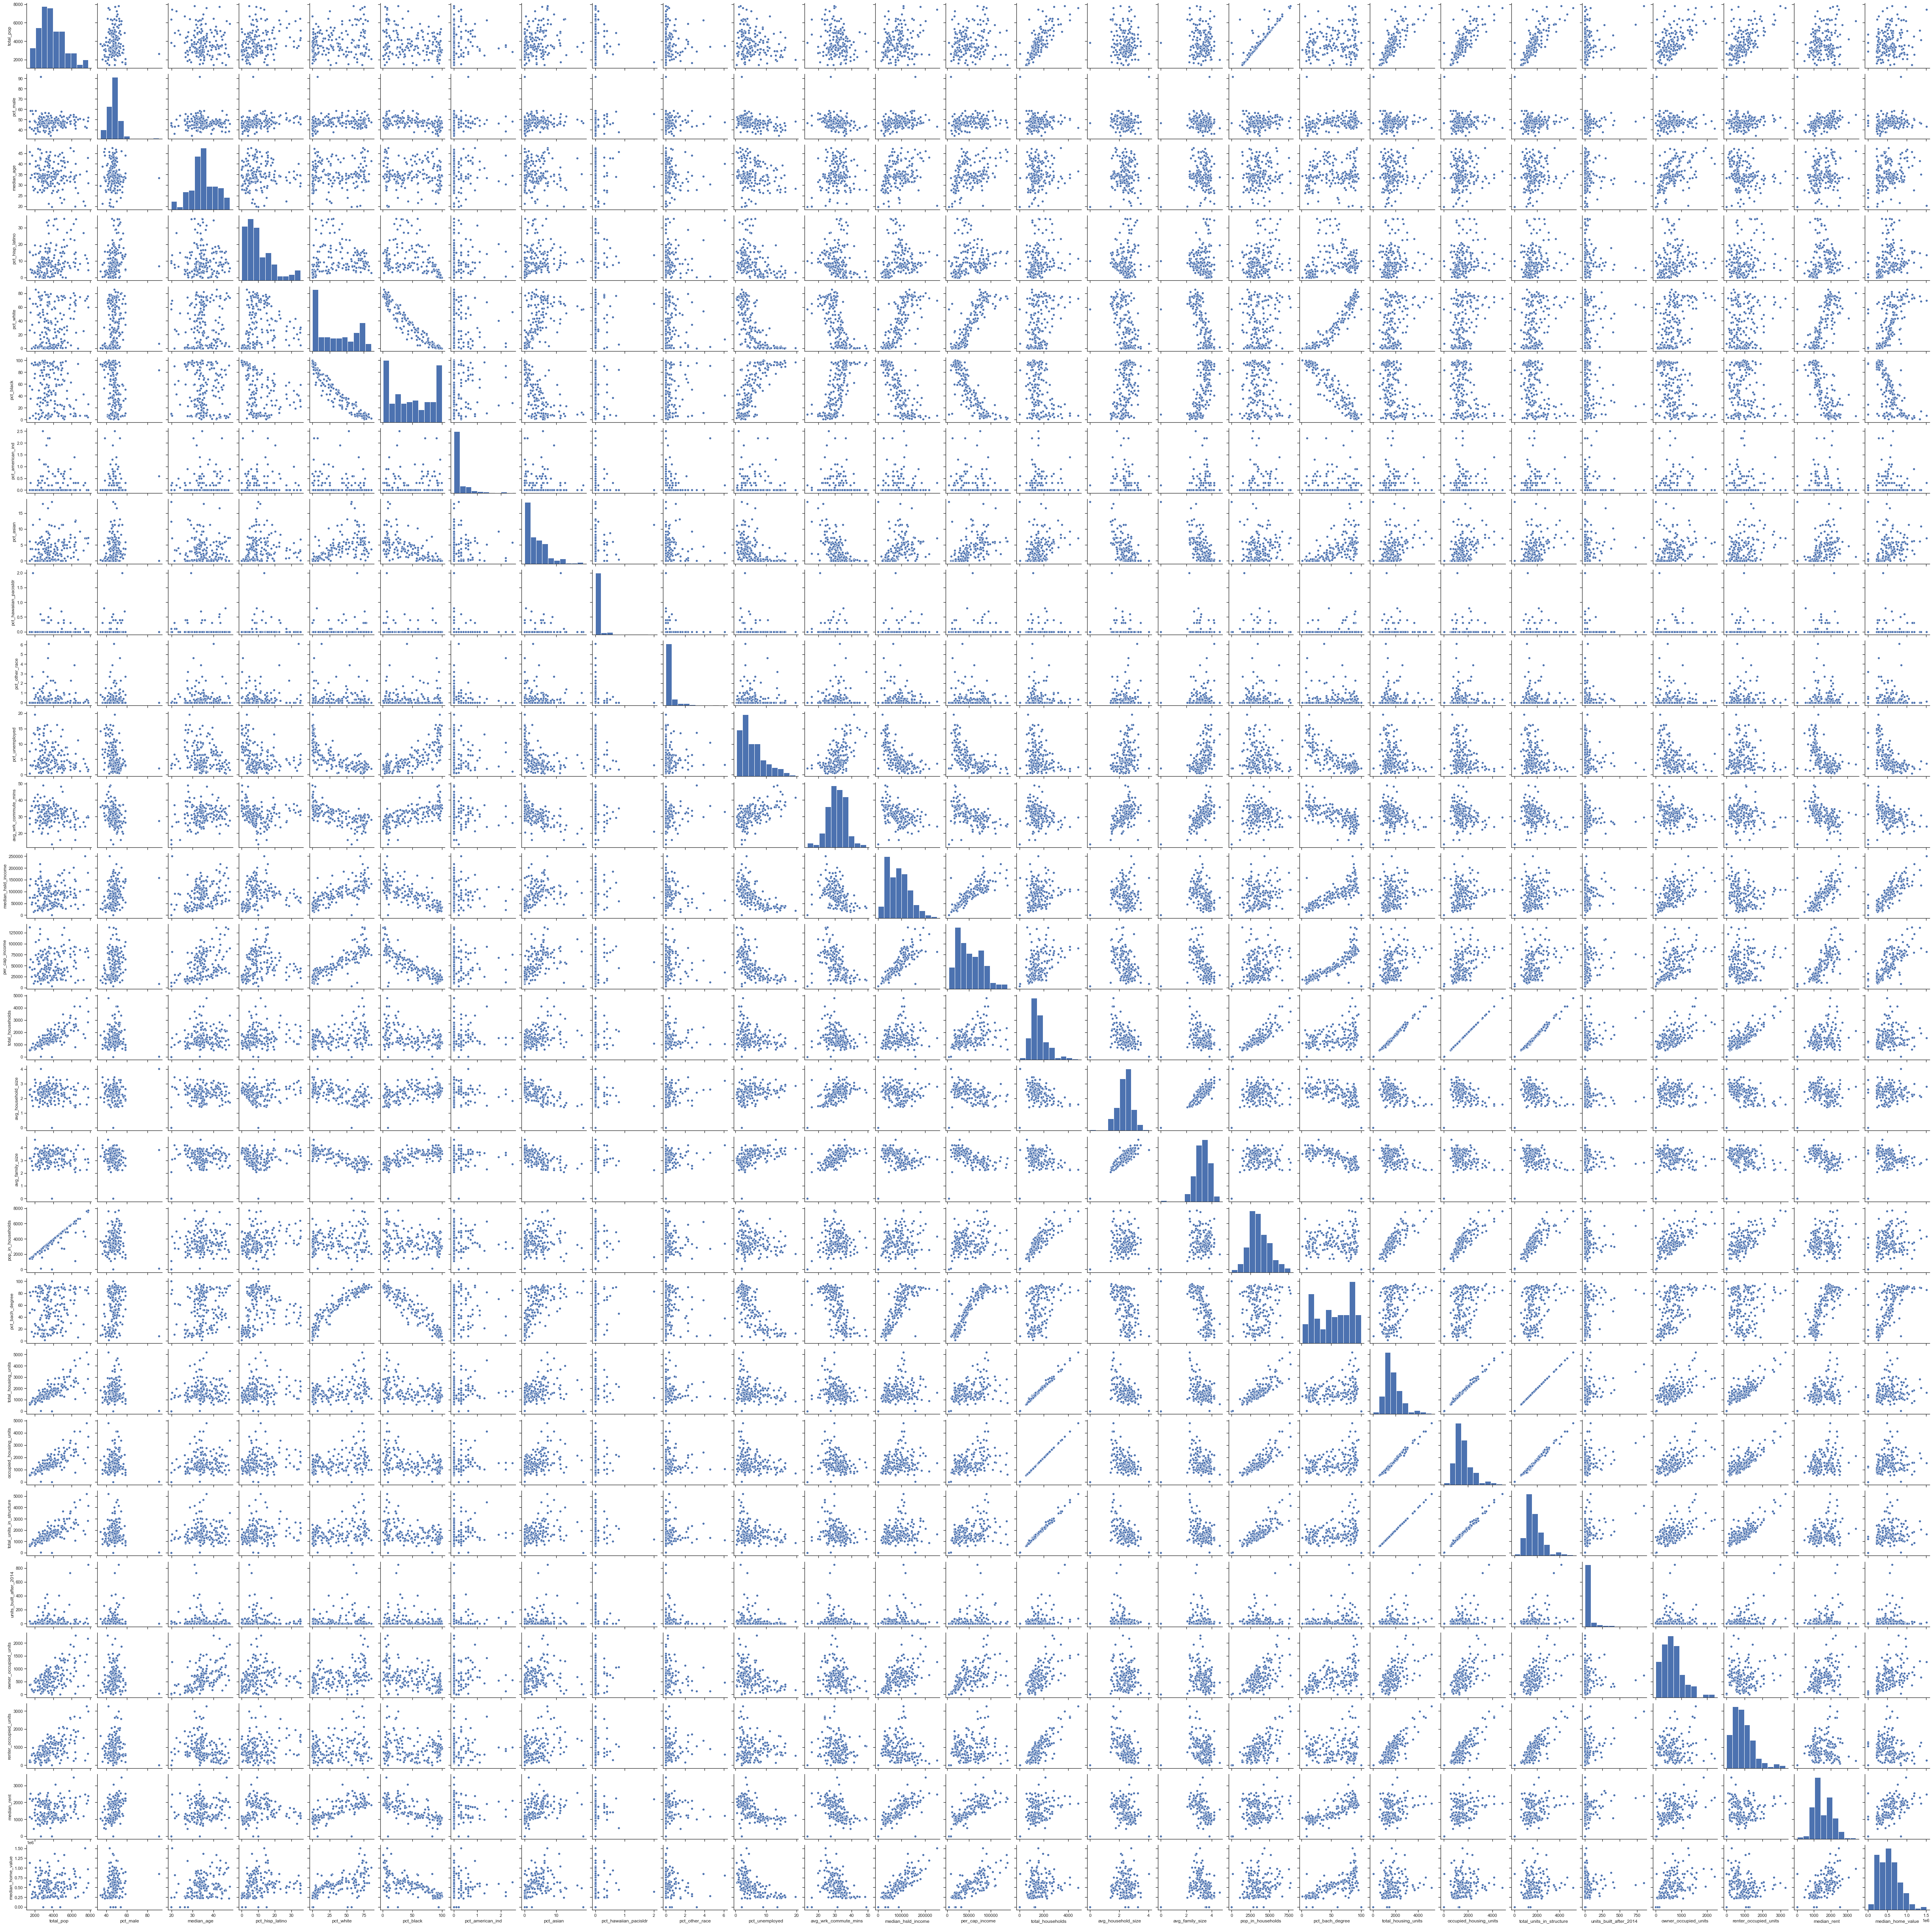

In [39]:
# Plot scatterplot matrix for reference:

sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data=df)

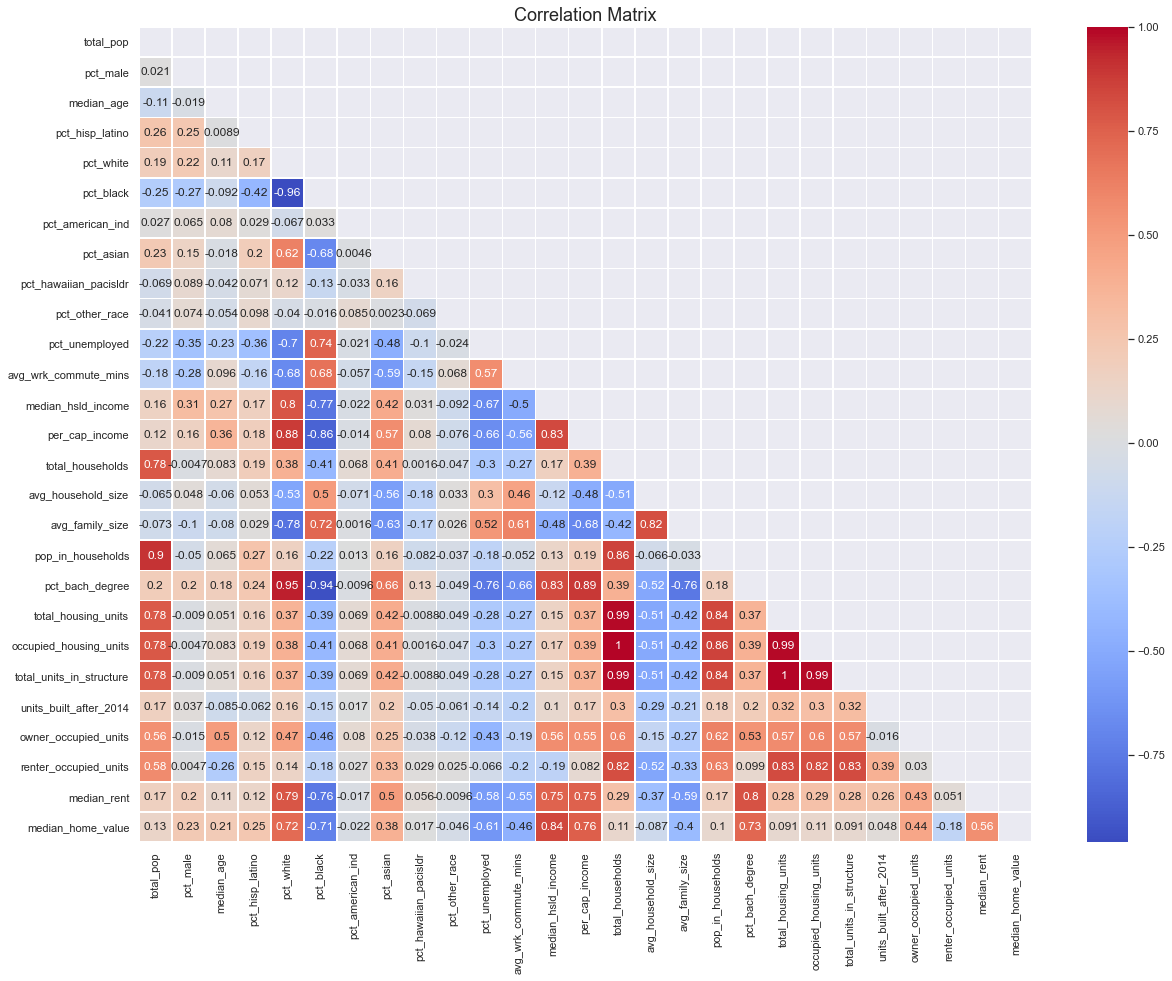

In [7]:
# Heat Map Correlation Matrix:

plt.figure(figsize=(20,15))
sns.set(font_scale=1)
plt.title('Correlation Matrix', fontsize=18)
mask = np.triu(df.corr())
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', 
                 linewidths=.5, mask=mask);

In [ ]:
# Based on the correlations, consider dropping:

# occupied_housing_units
# total_units_in_structure
# pop_in_households
# per_cap_income
# avg_family_size
# pct_male

In [ ]:
# Generate:

# urban_density: total_pop / per housing unit
# pct_minority (1-pct_white)
# pct_other_race = pct_americanind + pct_pacislndr + pct_other 

In [ ]:
# Other thoughts:

# Proportions of age groups vs median age
# Log transform variables for 
# Convert all variables to Z-scores prior to clustering (standard scalar)
# Look at heirarchical clutering, like Ward's clustering
# Look at self-organizing map (SOM)
# See soft classifiers like Fuzzy C-Means or Gustafson-Kessel algorithm, or m-logit

## Spatially Explore Data:

In [28]:
# Import shapefile:
shp = gpd.read_file('../data/spatial_data/dc_census_tracts_2018.shp')

# Remove State-level Identifier from Geo_ID Column for shapefile merge:
df['geo_id'] = df['geo_id'].str[-11:]
df[['geo_id']] = df[['geo_id']].apply(pd.to_numeric)

# Convert geo_id shp column to numeric:
shp['geo_id'] = shp['GEOID']
shp[['geo_id']] = shp[['geo_id']].apply(pd.to_numeric)

# Merge with `merge` method on shared variable (geo_id):
census_tracts = shp.merge(df, on='geo_id')

/Users/ericschultz/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/ericschultz/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/ericschultz/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.p

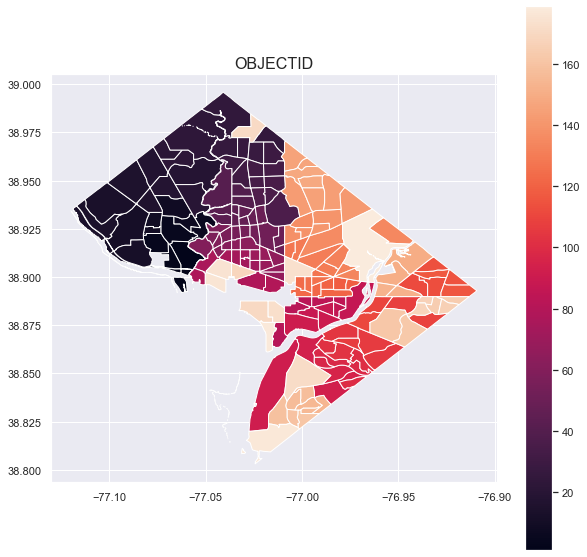

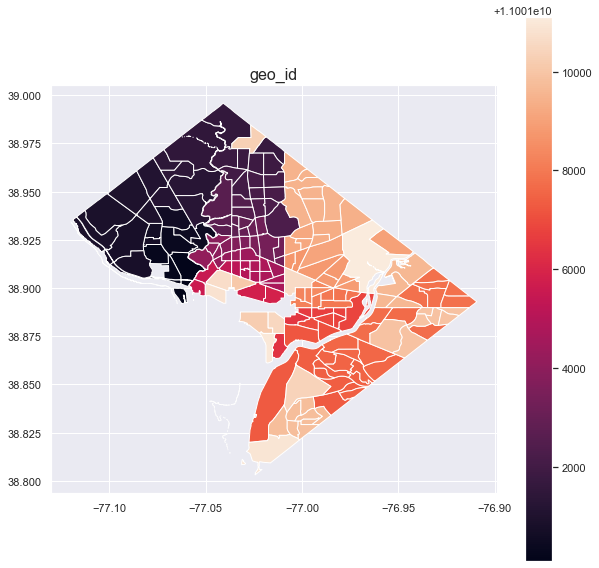

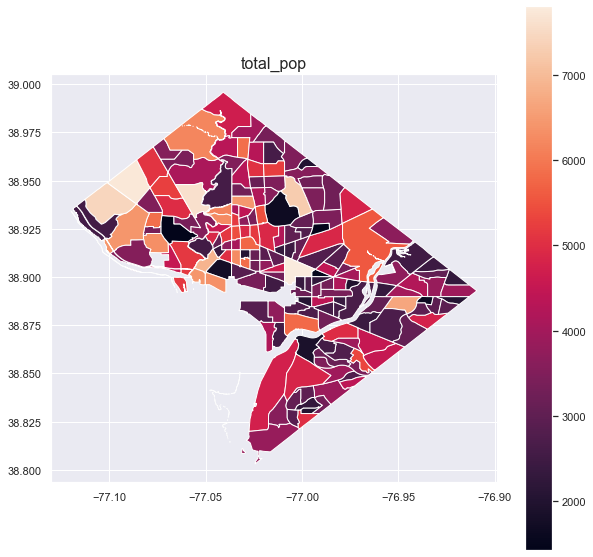

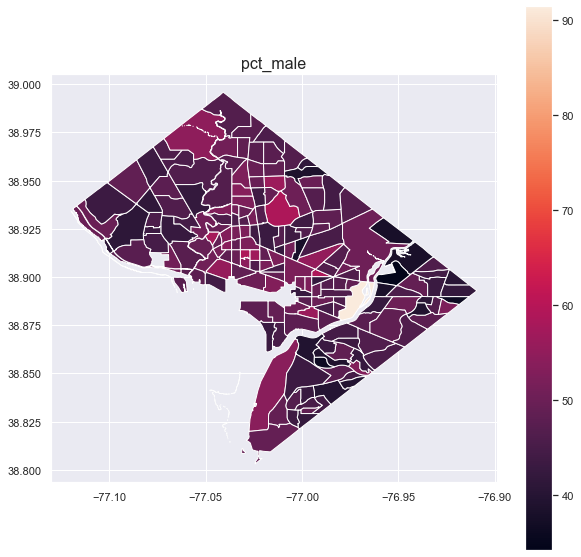

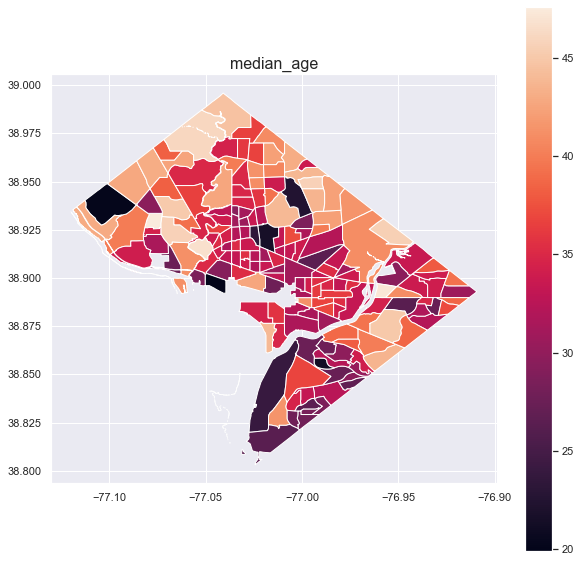

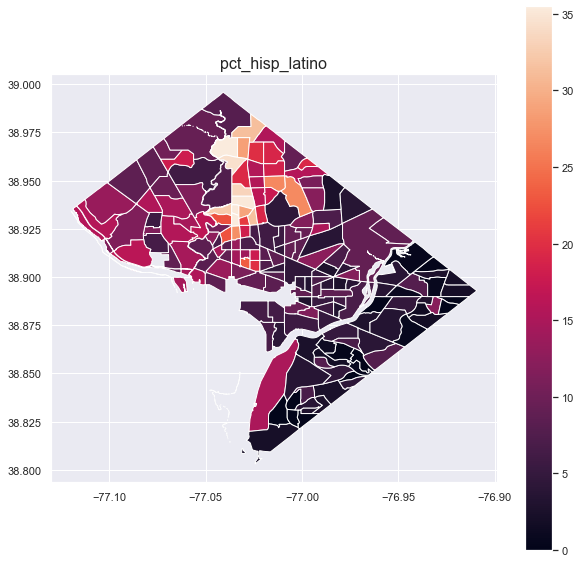

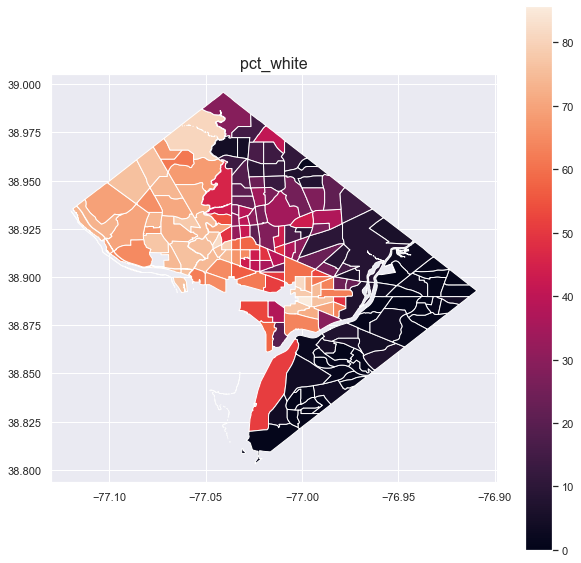

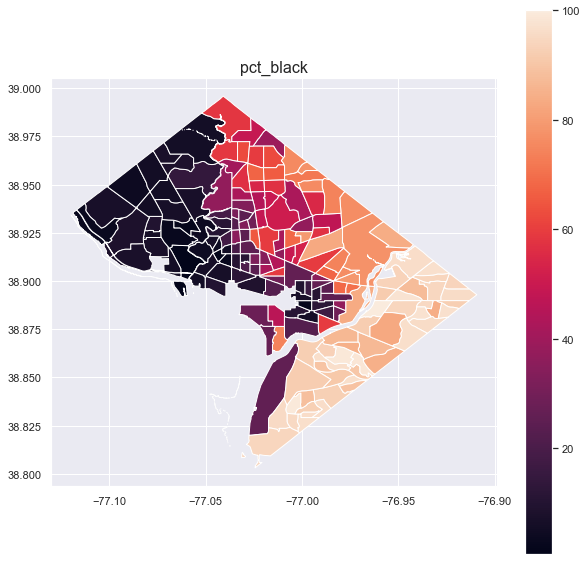

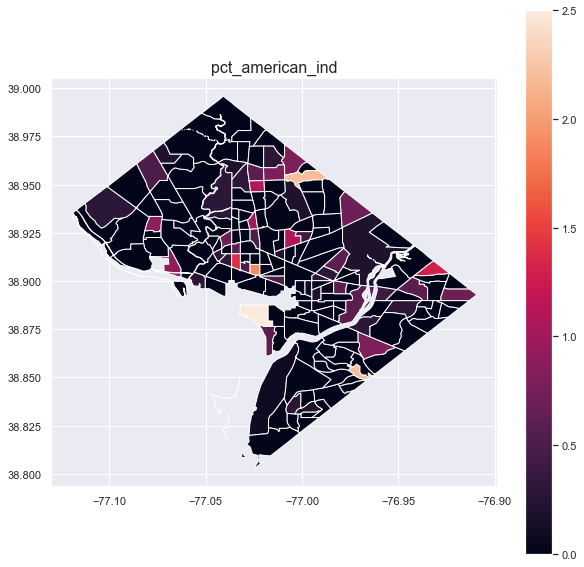

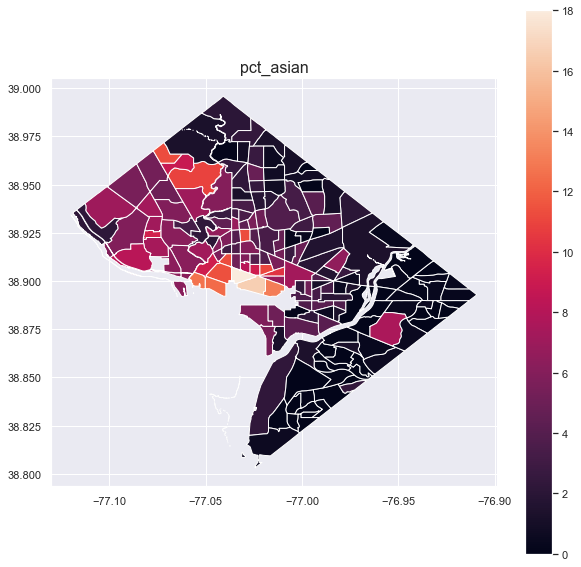

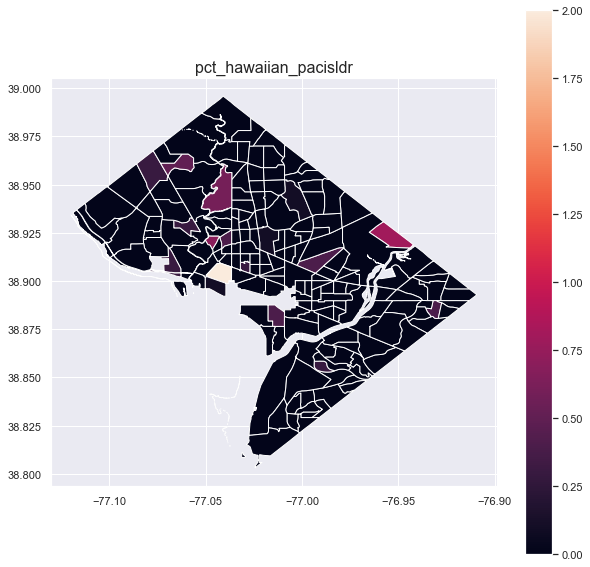

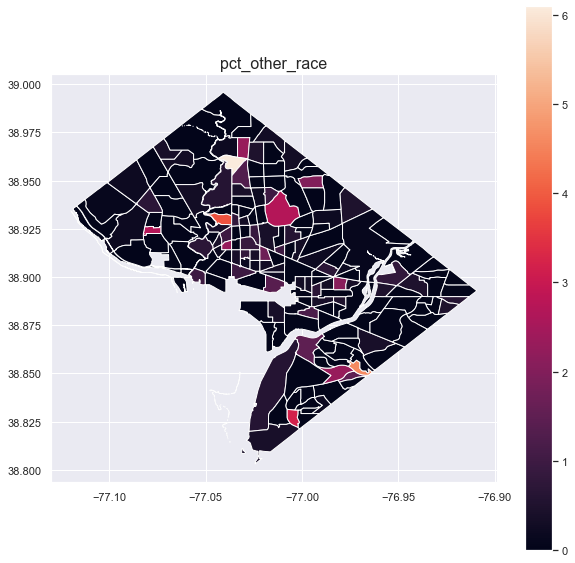

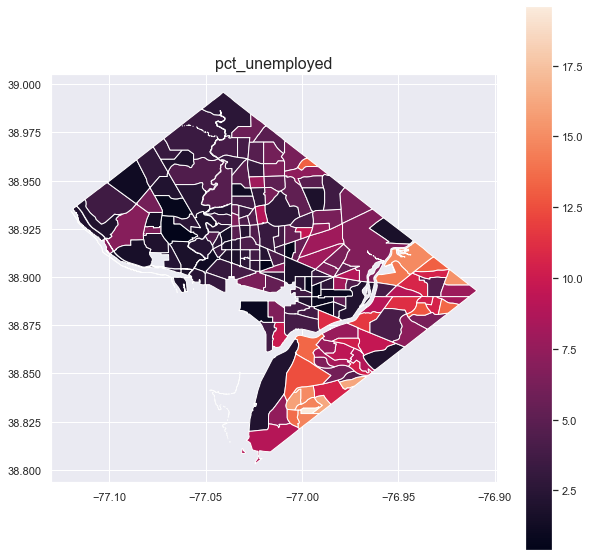

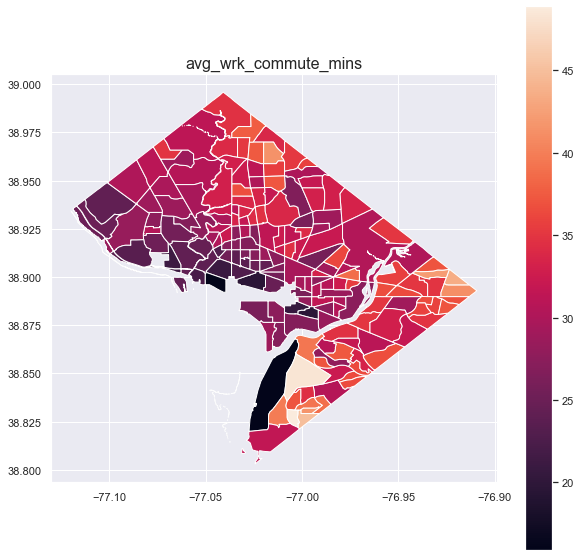

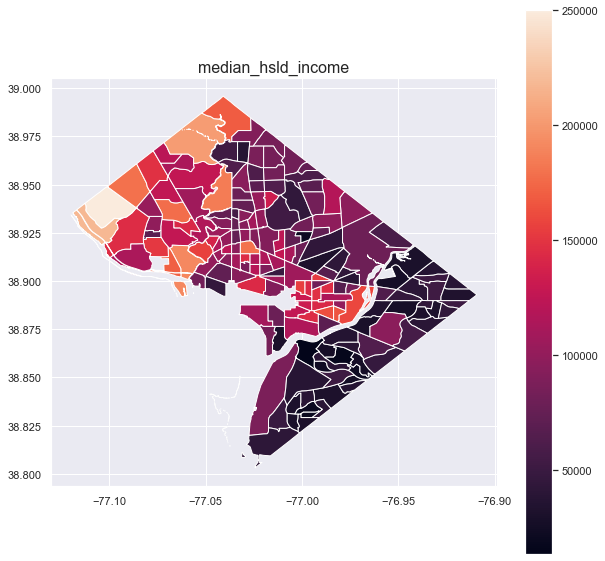

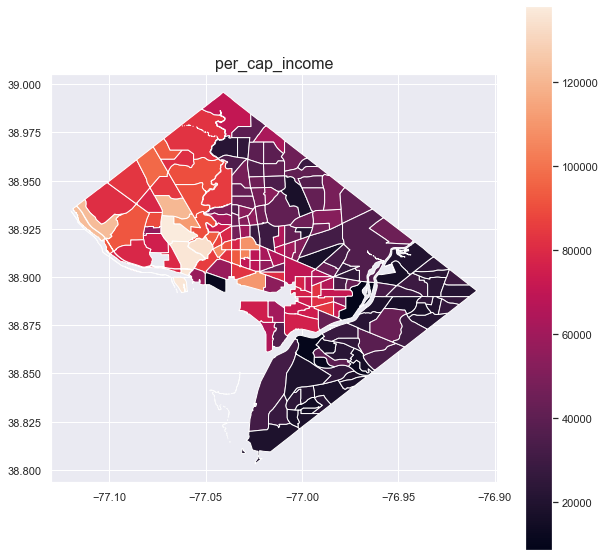

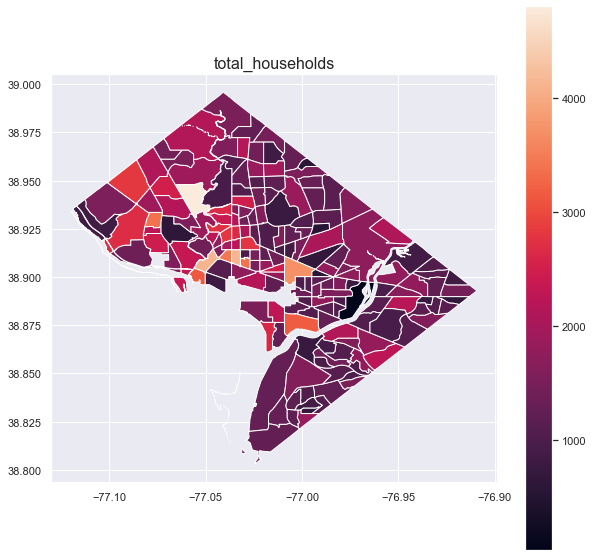

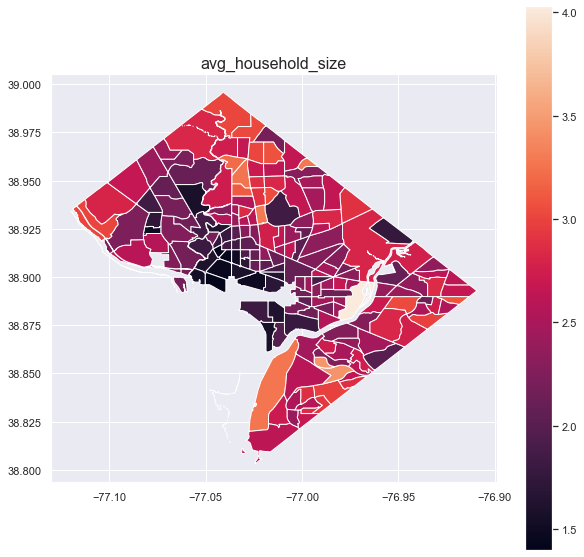

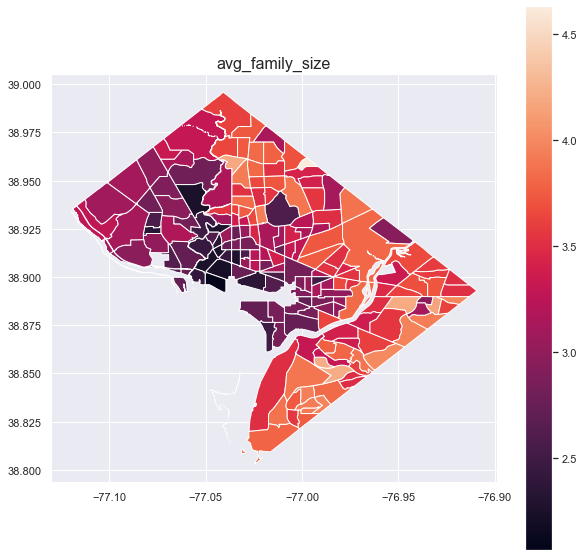

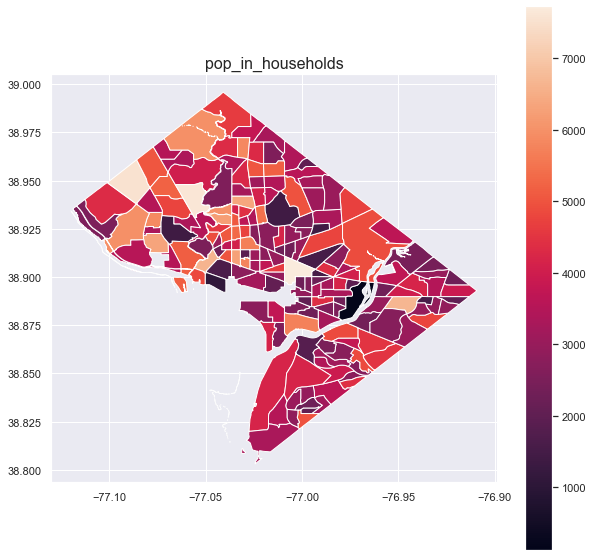

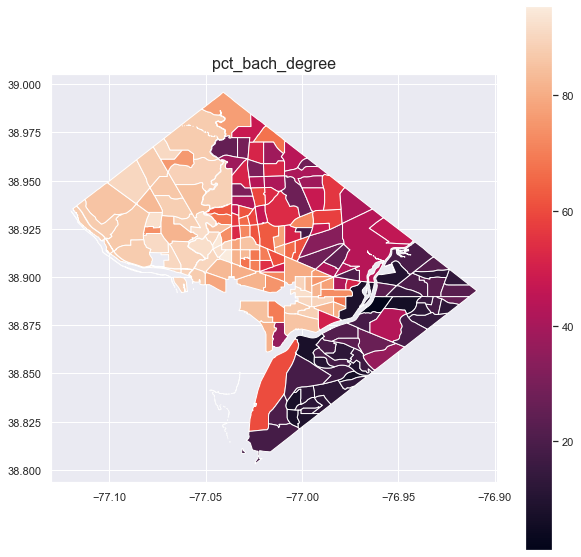

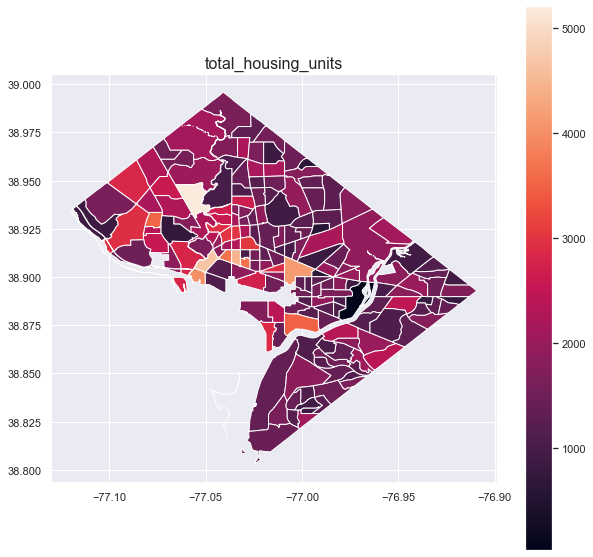

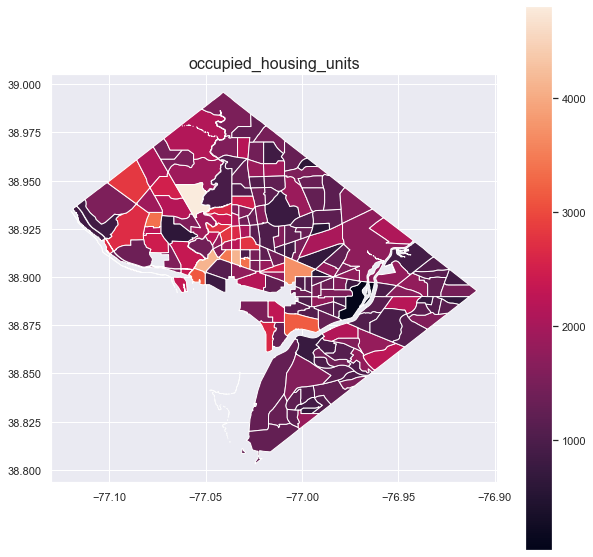

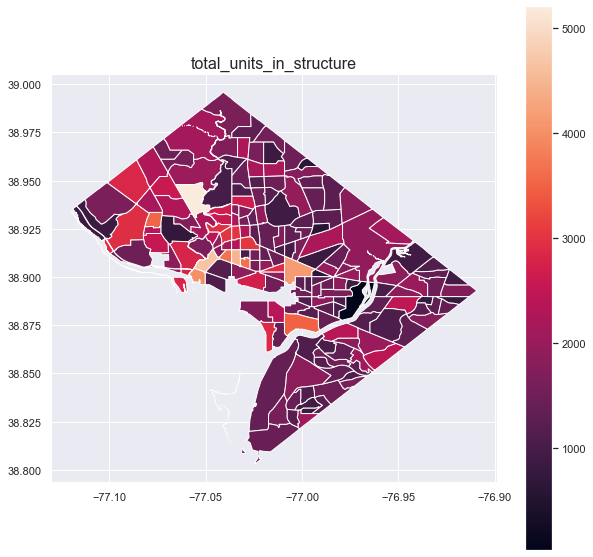

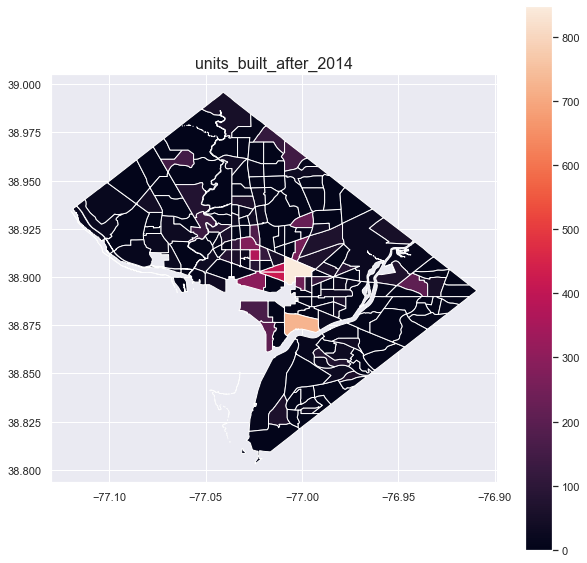

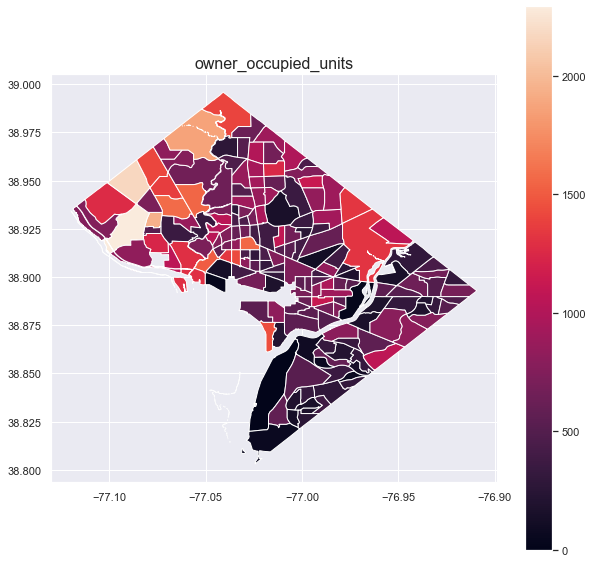

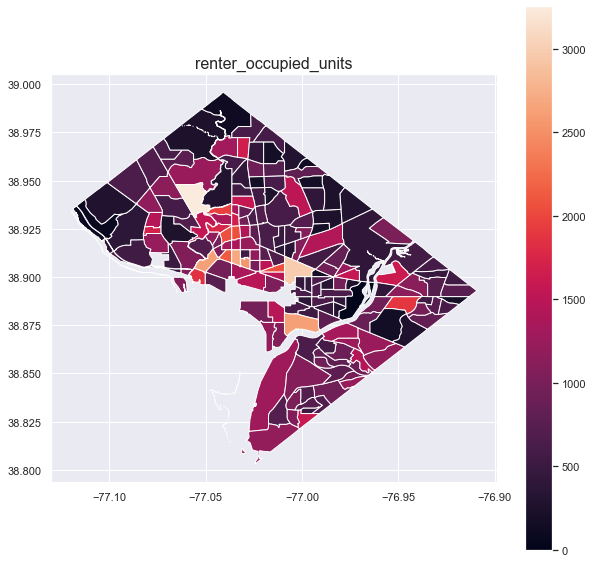

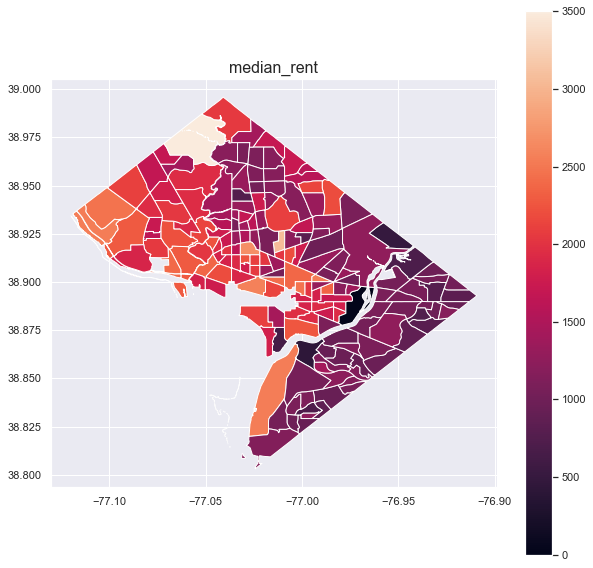

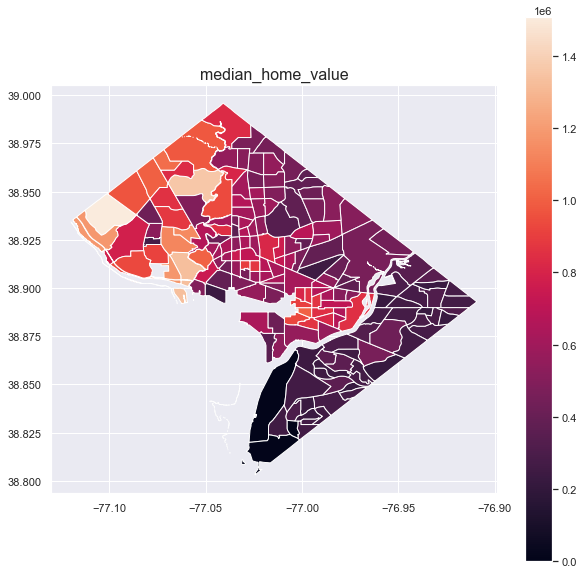

In [29]:
# Map all numeric variables:

for i in census_tracts.select_dtypes(include=['float64', 'int64']):
    census_tracts.plot(figsize=(10,10),
             column=census_tracts[i],
             legend=True)
    plt.title(f"{i}", fontsize=16);

## To Do and Next Steps:

    - Fetch 2018 ACS data on: 
        - Housing: done, in data folder (DONE)
        - Social: done, in data folder (DONE)
        - Economic: done, in data folder (DONE)
        - Demographics: done, in data folder (DONE)
    - Get data dictionaries and map to variable names (DONE)
    - Merge all data on census tract (179 observations) (DONE)
    - Drop unneeded rows (DONE)
    - Remove strange characters (+) from data (DONE)
    - Correlate all data on all variables (DONE)
    
    - Design some test and do some math to select varibles for clustering (DONE)
      (this will probably be the most time consuming aspect of the project) (SURE WAS!)
      
     - should I PCA this nonsense? 
      
    - Select a clustering algorithm (all the math nerds are saying gaussian mixtures are the way to go?) (DONE - Gaussian)
    - Do the cluster thing. (DONE)
    - Interpret results: understand the clusters--BE THE CLUSTERS. What defines them? (DONE)
    - Build/write cluster profiles
    - Create tableau dashboard 